# Comparison
- MUR: Multiplicative Update Rule for PMF
- HALS: Hierarchical Alternating Least Squares algorithm for NMF
- GCD: Greedy Coordinate Descent algorithm for NMF

In [1]:
using Plots
using SparseArrays
using NMF: nndsvd

In [2]:
include("FroNMF.jl");

In [3]:
M, N, K = 1000, 10000, 15;

In [4]:
max_iter = 200;

Dense matrix
-----------------

In [5]:
X = rand(MersenneTwister(1234), M, N);

In [6]:
# NNDSVD
W, H = nndsvd(X, K);
H = H';

In [7]:
curve_dense_mur = mur_solver(X, W, H, max_iter=max_iter)[3];

In [8]:
curve_dense_hals = hals_solver(X, W, H, max_iter=max_iter)[3];

In [9]:
curve_dense_gcd = gcd_solver(X, W, H, max_iter=max_iter)[3];

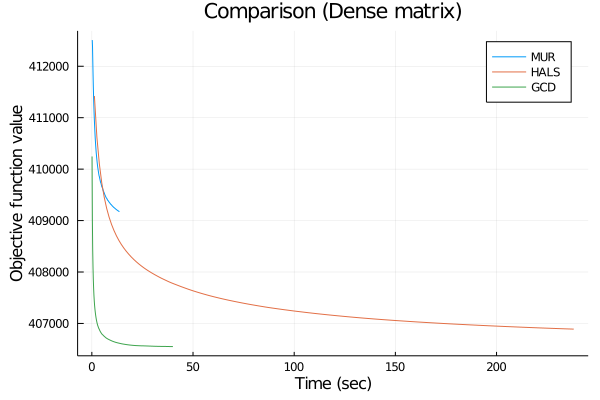

In [10]:
# Convergence curve
plot_ref = plot(xlabel="Time (sec)", ylabel="Objective function value", title="Comparison (Dense matrix)")
plot!(plot_ref, curve_dense_mur[2:end], label="MUR")
plot!(plot_ref, curve_dense_hals[2:end], label="HALS")
plot!(plot_ref, curve_dense_gcd[2:end], label="GCD")

Sparse matrix
------------------

In [11]:
# Density = 0.1
X = Array(sprand(MersenneTwister(1234), M, N, 0.1));

In [12]:
# NNDSVD
W, H = nndsvd(X, K);
H = H';

In [13]:
curve_sparse_mur = mur_solver(X, W, H, max_iter=max_iter)[3];

In [14]:
curve_sparse_hals = hals_solver(X, W, H, max_iter=max_iter)[3];

In [15]:
curve_sparse_gcd = gcd_solver(X, W, H, max_iter=max_iter)[3];

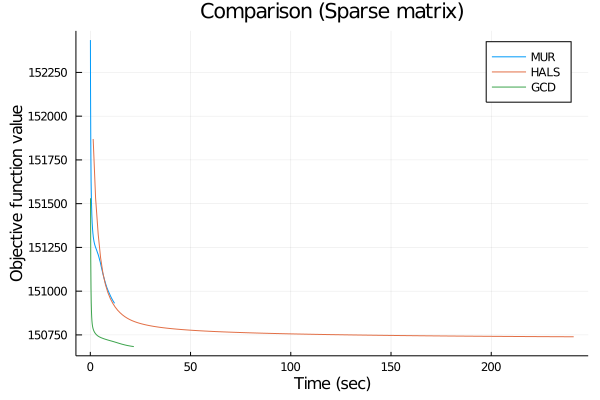

In [16]:
# Convergence curve
plot_ref = plot(xlabel="Time (sec)", ylabel="Objective function value", title="Comparison (Sparse matrix)")
plot!(plot_ref, curve_sparse_mur[2:end], label="MUR")
plot!(plot_ref, curve_sparse_hals[2:end], label="HALS")
plot!(plot_ref, curve_sparse_gcd[2:end], label="GCD")